# Water quality analysis

Final Data Science project for Start2Impact by Bautista Oliva

---

In this project, I'll analyze a dataset containing information about different water samples and their potability.  
The goal will be to understand how attributes are correlated to each other in order to train a good machine learning model to predict potability of new samples of water.

In [260]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import random

#setting the style for graphs
plt.style.use('fivethirtyeight')
#setting the working directory to a folder in which all the datasets used in the project are.
os.chdir("C:\\Users\\bauol\\Desktop\\Bautista\\Start2impact\\DataScience\\Progetto finale\\" )

## About Dataset
### Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1 pH value:  
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2 Hardness:  
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3 Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4 Chloramines:  
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5 Sulfate:  
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6 Conductivity:  
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7 Organic_carbon:  
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8 Trihalomethanes:  
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9 Turbidity:  
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10 Potability:  
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

Source: https://www.kaggle.com/datasets/adityakadiwal/water-potability

---

## Data loading

In [261]:
#importing the dataset and reading some lines of it.
water = pd.read_csv('water_potability.csv')

As requested first of all I'll split the dataset into training and test sets

### Train Test split

In [262]:
X_train, X_test, y_train, y_test = split(water.drop("Potability", axis=1), water.Potability, test_size=0.3, shuffle=True, random_state=10, stratify=water.Potability) 

The *stratify* parameter make each set to contain approximately the same percentage of samples of each target class as the complete set.

---

## Data Exploration

We can start exploring the dataset and understand what what are we working with.  
I'll conduct the analysi on the entire dataset.

In [263]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


We notice that:  
* There are missing values
- The target variable is categorical --> classification problem
- All attributes are numeric
- attributes have differents orders of magnitude

In [264]:
water.shape

(3276, 10)

In [265]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [266]:
# Traforming the target value from "integer" to class
water["Potability"]=pd.Categorical(water["Potability"])

We see that "Non-Null Count" has different counts.  
Let's count missing values

In [267]:
#Displaying missing values
pd.DataFrame({"missing values":water.isnull().sum(),"missing values rate":round(water.isnull().sum()/water.shape[0]*100,2).astype(str) + '%'})

,missing values,missing values rate
ph,491,14.99%
Hardness,0,0.0%
Solids,0,0.0%
Chloramines,0,0.0%
Sulfate,781,23.84%
Conductivity,0,0.0%
Organic_carbon,0,0.0%
Trihalomethanes,162,4.95%
Turbidity,0,0.0%
Potability,0,0.0%


We'll have to manage them later

In [268]:
# Look at basic statistics
water.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [269]:
# Look at basic statistics for class 1
water.query("Potability == 1").describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1101.0,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.0,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.0,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.0,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.0,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.0,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.0,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.0,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.0,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


Italian regulations on the potability of water for human consumption (Legislative Decree 31/2001 et smi) require that the pH value of drinking water be within the range of 6.5-9.5. These values were chosen on the basis of statements by the World Health Organization, which specifically considers the pH of water to be an important parameter for assessing water quality.  
This make ph minimum value of 0.23 and maximum of 13.18 quite extreeme values.

In [270]:
# Look at basic statistics for class 2
water.query("Potability == 0").describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1684.0,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.0,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.0,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.0,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.0,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.0,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.0,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.0,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.0,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


From this table is not easy to get a general overview.  
Better plot the data.

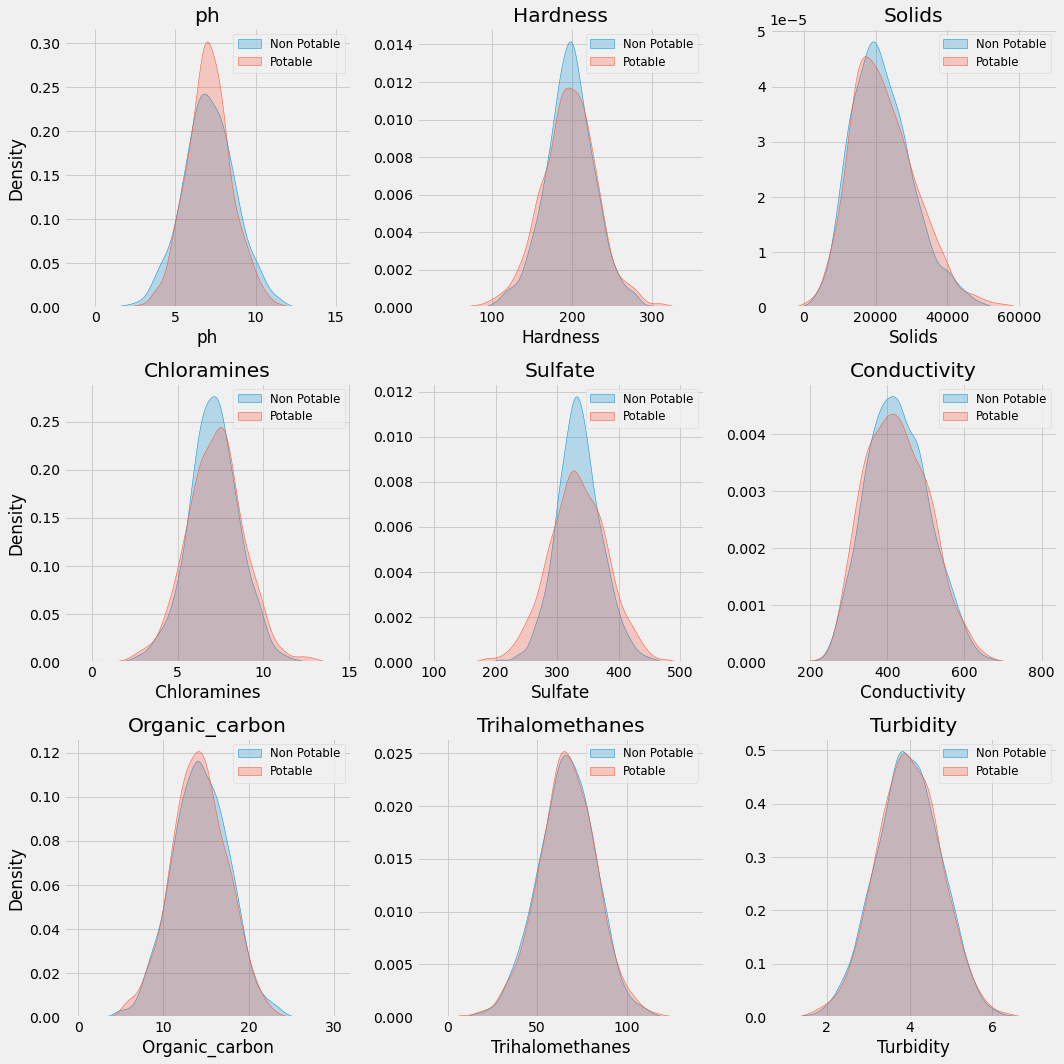

In [271]:
# Density functions of variable (keeping target groups separated)
plt.figure(figsize = (15,15))
counter=0 #create a counter which "cos()" is 1 only for the first plot of the line in order to omit the y label for the other 2
for ax, col in enumerate(water.columns[:9]):
    plt.subplot(3,3, ax + 1)
    sns.kdeplot(x = water.query("Potability == 0")[col], label = "Non Potable", shade="fill")
    sns.kdeplot(x = water.query("Potability == 1")[col], label = "Potable", shade="fill")
    plt.title(col)
    if np.cos(counter) != 1:
        plt.ylabel("")
    else:
        pass
    counter +=(2/3)*np.pi
    plt.legend(fontsize="small")
plt.tight_layout()
# How to read the graph: choosen 2 points on the abscissa, x' and x'' (with x' < x'') , 
# the correspondent colored area of the graph between those 2 points represents
# the probability of randomly extract a value x that is x'< x < x'' from the samples.

We can generalize all the variables are distributed like a  Normal distributions.  
It looks like there is no big difference between the 2 classes. We must go deeper on this.  

Let's also start looking at the relations between variables.

<Figure size 720x720 with 0 Axes>

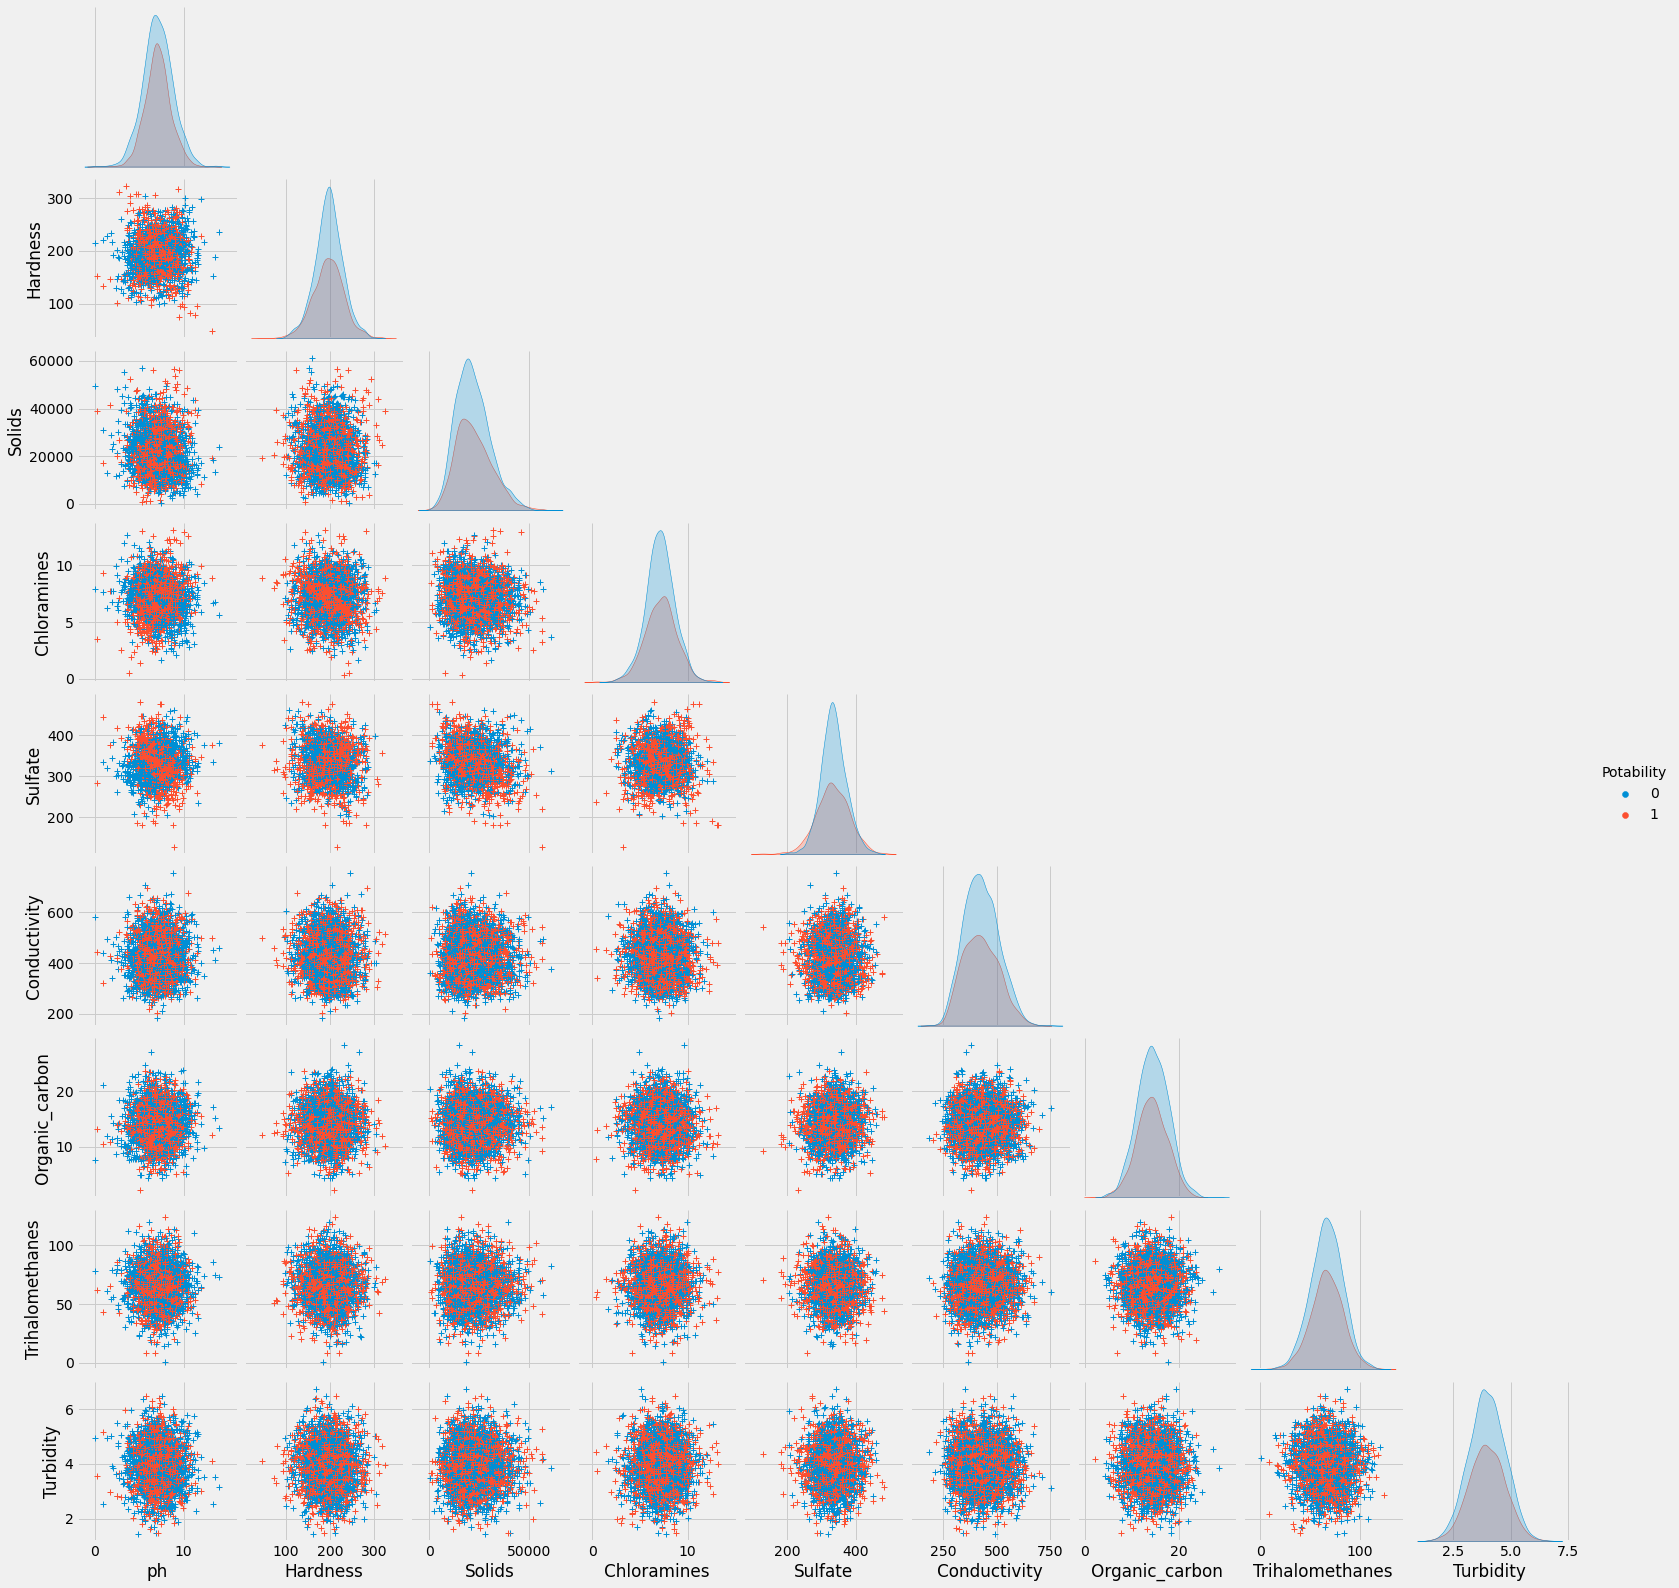

In [272]:
plt.figure(figsize = (10,10))
sns.pairplot(water, hue="Potability",plot_kws=dict(marker="+", linewidth=1),corner=True)
plt.show()

This graph does not bode well.  
Variables do not seem to have any kind of correlation.  
A negative linear correlation looks to appear for Potable water between Chloramine ~ Hardness but we will check with the correlation matrix.  
From the marginal distributions we can see that, as seen in the previous graph, the distributions are Normal, but in this case where we are not plotting the density functions, we can have one more piece of information: from the fact that the curves have different heights, **but not different widths**, we can deduce that one group (the one with the lowest curve) has lower numerosity, and therefore the classes are not equally balanced.


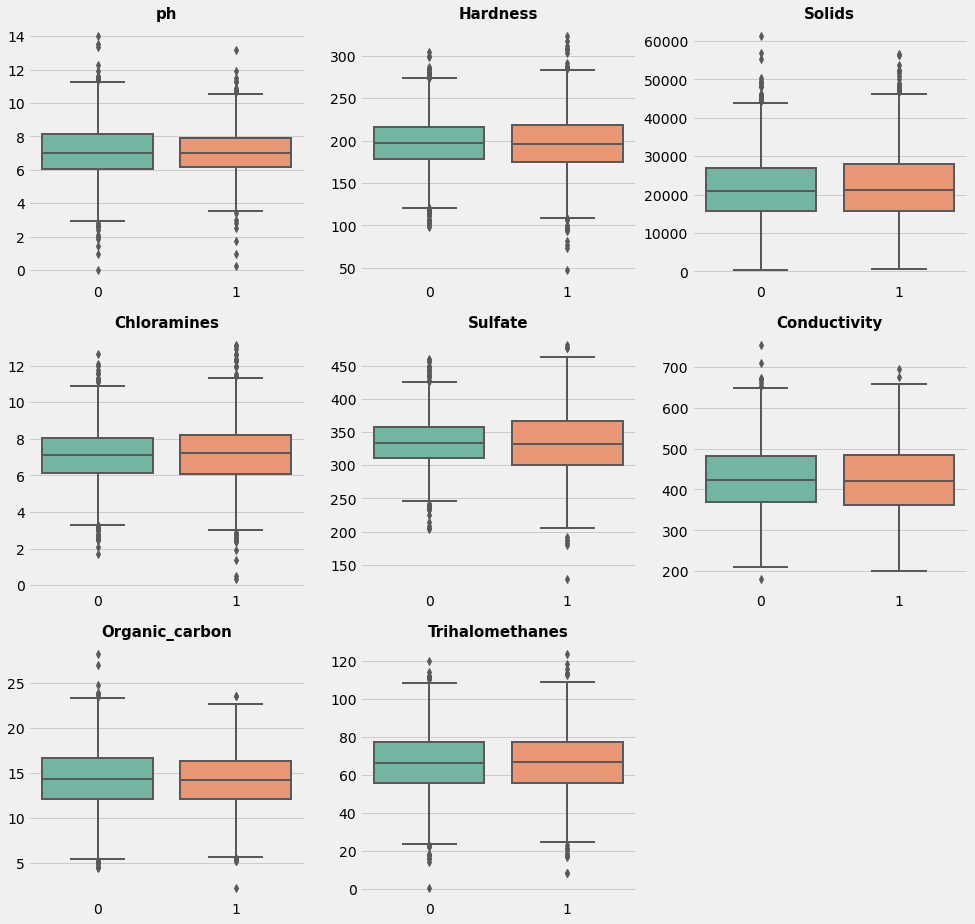

In [273]:
# Boxplots
fig = plt.figure(figsize=(15,15))
for i, attribute in enumerate(water.columns[0:len(water.columns)-2]):
    ax = fig.add_subplot(3,3,i+1)
    sns.boxplot( y=attribute ,x="Potability", data=water, palette="Set2",linewidth=2)
    ax.set(xlabel=None, ylabel=None)
    plt.title(attribute ,fontsize = 15, fontweight = "bold")
    
plt.show()

In Boxplots we can see that medians for the 2 classes are similar.  
One thing to notice is that many outliers are presented.  
In a boxplot a point is considered an outlier if it is bigger than the Q3  (3° quatile or 75° percentile) plus 1.5 times the interquantile rage (Q3-Q1 which represents the range in which to find the central 50% of the population) **OR** smaller than Q1 less 1.5 Interquantile range.  
It doesn't mean that they are real outliers, but it means that we will have to focus on this and analyse it better.

---

## Data Manipulation

### Standardization

First thing I'll scale the data in order to avoid problems with different magnitude orders or measure units.  
As sawn before, for example, Solids attribute has a mean of 22014, while Turbidity is smaller than 4.  
It would represent a problem in the application of certain algorithms. Particularly in those which use a distance metric as KNN or Kmeans. In those algorithms, a distance of 100 units of Solids would completely cancel a distance of 1 unit in Turbidity while we know that in the second case this distance should have more importance.

In [274]:
ind_train=X_train.index
ind_test=X_test.index

In [275]:
# Scaling data by detracting the mean and divide by the standar deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# next 2 rows are a check if scaling went trough correctly
mean_std=pd.DataFrame({"Mean_train":round(pd.DataFrame(X_train).mean(),2),"Mean_test":round(pd.DataFrame(X_test).mean(),2),
                      "Std_train":round(pd.DataFrame(X_train).std(),2),"Std_test":round(pd.DataFrame(X_test).std(),2)})
print(mean_std)

   Mean_train  Mean_test  Std_train  Std_test
0        -0.0       0.06        1.0      0.98
1         0.0       0.04        1.0      1.00
2         0.0       0.03        1.0      0.98
3        -0.0      -0.01        1.0      0.99
4        -0.0       0.02        1.0      0.91
5         0.0      -0.07        1.0      0.94
6        -0.0      -0.02        1.0      0.95
7         0.0       0.05        1.0      1.03
8        -0.0       0.07        1.0      0.98


From the table we can confirm that the scaling was succesful, infact mean and sd on the training are exacly 0 and 1, while for the training set they are values close to those.

In [276]:
# fixing losted format
X_train.rename(columns = {i:water.columns[i] for i in range(0,len(water.columns)-1)}, inplace=True)
X_test.rename(columns = {i:water.columns[i] for i in range(0,len(water.columns)-1)}, inplace=True)

In [277]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.884510,3.273231,1.279452,-1.705302,NaN,0.806518,-0.266630,0.364268,1.370440
1,-0.331795,-0.388585,-0.869776,0.794482,0.931507,0.819854,-0.796118,-0.469004,-0.862792
2,1.933916,-0.552857,-0.148092,-0.863835,NaN,0.728206,0.648879,-1.097666,-1.465359
3,0.244551,-0.460525,-0.422734,0.913161,1.689299,1.663205,0.136606,-0.525432,-2.240545
4,0.818130,0.672594,0.769013,-1.004505,-0.545236,0.529751,-1.092315,-1.023836,-0.297410
...,...,...,...,...,...,...,...,...,...
2288,0.610991,-1.154086,-0.259231,0.822466,-1.180469,0.040473,1.903158,-0.387164,0.559714
2289,-0.562444,-0.808733,0.220619,0.130282,0.995217,-0.661633,0.415538,-1.115735,1.144598
2290,-0.006642,0.093265,0.063367,0.519809,NaN,1.258195,0.113546,-0.484532,-0.022196
2291,-1.599850,-0.235824,-0.799241,0.855629,0.958203,1.101483,-0.918867,-0.062004,-0.220599


In [278]:
X_train["index"]=ind_train
X_test["index"]=ind_test
X_train.set_index(X_train["index"], inplace=True,drop=True)
X_test.set_index(X_test["index"], inplace=True,drop=True)

### Outliers

As we notice in boxplots there are some extreme values we need to check.  
In this case if we devide to get rid of some observations, we'll do it only on the training set.

I'll first look for outliers only on the subset of the training set with only variables with no missing data.  
Once I did that if outliers I found are also the observations with NaNs in the excluded variables then I'll drop the row.  
This is because there could be a correlation between Missing data and extreme values.  
After that I'll manage Missing values and than again check for outliers, but this time considering all the variables.
By treating Missing values first it may happen that, by inferring statistics to MV, we could hide some outliers.

In [279]:
#Bacause the input variables have a Gaussian distribution to detect outliers 
#I selected the Minimum Covariance Determinant as the algorithm to find possible outliers
# identify outliers in the training dataset
from sklearn.covariance import EllipticEnvelope
X_train_noNa=X_train.drop(columns=["ph","Sulfate","Trihalomethanes"])
ee = EllipticEnvelope(contamination=0.05)
yhat = ee.fit_predict(X_train_noNa)
X_train["outlier"]=yhat
#print(X_train[X_train.outlier==-1].loc[:, ["ph","Sulfate","Trihalomethanes","outlier"]])
print("{} of the {} outliers cointain NaN values ({}%)".format(X_train[X_train.outlier==-1].isnull().any(axis=1).sum(),
                                                              X_train[X_train.outlier==-1]["outlier"].count(),
                                                              round(X_train[X_train.outlier==-1].isnull().any(axis=1).sum()/X_train[X_train.outlier==-1]["outlier"].count()*100,2)))


46 of the 115 outliers cointain NaN values (40.0%)


I'll drop those lines and take care of the other missing values.

In [280]:
pd.DataFrame({"missing values":X_train.isnull().sum(),
              "missing values rate":round(X_train.isnull().sum()/X_train.shape[0]*100,2).astype(str) + '%',
              "Potable NaNs":X_train.loc[y_train[y_train == 1].index].isnull().sum(),
              "Potable rate":round(X_train.loc[y_train[y_train == 1].index].isnull().sum()/X_train.loc[y_train[y_train == 1].index].shape[0]*100,2).astype(str) + '%',
              "Non Potable NaNs":X_train.loc[y_train[y_train == 0].index].isnull().sum(),
              "Non Potable rate":round(X_train.loc[y_train[y_train == 0].index].isnull().sum()/X_train.loc[y_train[y_train == 0].index].shape[0]*100,2).astype(str) + '%'
             })

,missing values,missing values rate,Potable NaNs,Potable rate,Non Potable NaNs,Non Potable rate
ph,348,15.18%,115,12.85%,233,16.67%
Hardness,0,0.0%,0,0.0%,0,0.0%
Solids,0,0.0%,0,0.0%,0,0.0%
Chloramines,0,0.0%,0,0.0%,0,0.0%
Sulfate,541,23.59%,205,22.91%,336,24.03%
Conductivity,0,0.0%,0,0.0%,0,0.0%
Organic_carbon,0,0.0%,0,0.0%,0,0.0%
Trihalomethanes,117,5.1%,40,4.47%,77,5.51%
Turbidity,0,0.0%,0,0.0%,0,0.0%
index,0,0.0%,0,0.0%,0,0.0%


There is no significant difference between the 2 classes. It means that missing values aren't correlated to attributes.

In [281]:
X_train = pd.concat([X_train.loc[X_train[X_train.outlier == -1].index].dropna(),X_train.loc[X_train[X_train.outlier != -1].index]], axis=0)
y_train = y_train.loc[X_train.index]

In [282]:
 pd.DataFrame({"missing values":X_train.isnull().sum(),
              "missing values rate":round(X_train.isnull().sum()/X_train.shape[0]*100,2).astype(str) + '%',
              "Potable NaNs":X_train.loc[y_train[y_train == 1].index].isnull().sum(),
              "Potable rate":round(X_train.loc[y_train[y_train == 1].index].isnull().sum()/X_train.loc[y_train[y_train == 1].index].shape[0]*100,2).astype(str) + '%',
              "Non Potable NaNs":X_train.loc[y_train[y_train == 0].index].isnull().sum(),
              "Non Potable rate":round(X_train.loc[y_train[y_train == 0].index].isnull().sum()/X_train.loc[y_train[y_train == 0].index].shape[0]*100,2).astype(str) + '%'
             })

,missing values,missing values rate,Potable NaNs,Potable rate,Non Potable NaNs,Non Potable rate
ph,334,14.86%,110,12.6%,224,16.3%
Hardness,0,0.0%,0,0.0%,0,0.0%
Solids,0,0.0%,0,0.0%,0,0.0%
Chloramines,0,0.0%,0,0.0%,0,0.0%
Sulfate,509,22.65%,189,21.65%,320,23.29%
Conductivity,0,0.0%,0,0.0%,0,0.0%
Organic_carbon,0,0.0%,0,0.0%,0,0.0%
Trihalomethanes,112,4.98%,37,4.24%,75,5.46%
Turbidity,0,0.0%,0,0.0%,0,0.0%
index,0,0.0%,0,0.0%,0,0.0%


### Correlations and significance 

Before managing missing values is better to analyze correlations.  
That is because we may find out that a particular variable with missing values is not useful to out model.

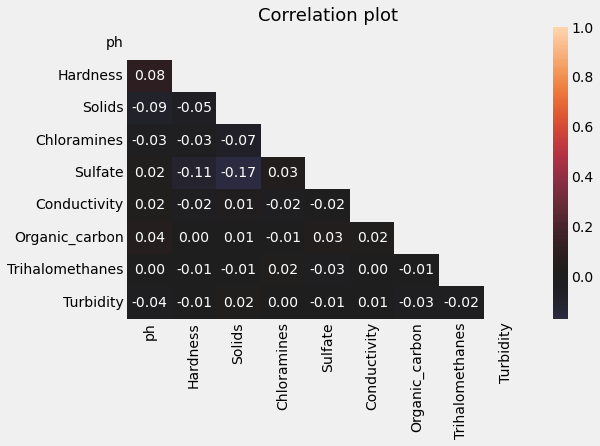

In [283]:
#I'll plot the correlation matrix

mask = np.triu(np.ones_like(water.corr(), dtype=bool)) #mask to hide half of the graph (which is simmetric and has 1s on the diagonal)

plt.figure(figsize=(8,5))

hm = sns.heatmap(water.corr(), mask=mask, center=0, vmax=1, annot=True, fmt='.2f')
hm.axes.set_title("Correlation plot",fontsize=18)
plt.show()

There is no linear correlation, neither positive nor negative.  
This tell us that it would be completely useless to fit to the data a linear predictive model. It is  not possible to predict a variable from a linear funtion of the observations.  
Because of the evident Normal distribution of all the attributes I'm afraid variables can be indipendet non only linearly speaking.

### Variable significance

Now I'll check which variables are significantly different for the 2 classes. This is useful because those variable are the ones which will have more wheight during the classification.  
For this analysi I'll use both training and test sets in order to have more robust results. This procedure is not evalidating the fitting of the model.

We'll proceed with hypothesis testing on the expected values of Normally distributed variables.  
As we already verified we can affirm that all the variables are approximable to Normal distributions so this hypothesis is confimed.  
The null hypothesis (H0) is that the *expected value of a variable is the same for the 2 groups*.  
The *expected value* is an unbiased and efficient estimator of the mean value of a random variable.

Necesarry hypotesis to apply the Z-test:  
1. X(potable) ~ N ( mu(potable), Var(potable) ) with Var known and x1, x2, ... , x.n(potable) are a random sample of X(potable)
2. X(non) ~ N ( mu(non), Var(non) ) with Var known and x1, x2, ... , x.n(non) are a random sample of X(non)
3. X(potable) and X(non) are indipendent 

Hypothesis are: 
* $$H_{0} = \mu _{potable} = \mu _{non} $$
- $$H_{1} = \mu _{potable} \neq  \mu _{non}$$

This hypothesis is the equivalent of testing the following hypothesis:
* $$H_{0} = \mu _{potable} - \mu _{non} =  0$$
- $$H_{1} = \mu _{potable} - \mu _{non} \neq  0$$

For the testing we'll use the z statistic:  
$$ z = \frac{(\overline{x}_{potable} - \overline{x}_{non})}{\sqrt{\frac{\delta _{potable}^{2}}{n_{potable}}+\frac{\delta _{non}^{2}}{n_{non}}}} $$  
Where n is the numerosity of the sample.  
The formula can be written also as $$\frac{(\overline{x}_{potable} - \overline{x}_{non})-(\mu _{potable} - \mu _{non})}{\sqrt{\frac{\delta _{potable}^{2}}{n_{potable}}+\frac{\delta _{non}^{2}}{n_{non}}}}$$ but as know the second parentesis is equal  to (0 + 0).  
The cool thing is that we know:  
$$z\mid H_{0} \sim N (0,1)$$  


By knowing which distribution *z* follows, we only need to decide the level of significance (alpha) that we want for our test and calculate the boundaries to compare the observed *z* with.  

In which case do we reject H0?  
By looking at the test we see that if H0 is true then the numerator of *z* would be ≈ 0.  
It means that we would reject H0 if the observed z is far from 0. (How far? It depends on alpha).  
Once we choose alpha we have the boundaries which are, one time positive and one time negative, the 1-(alpha/2) percentile of the Standard Normal distribution.

In [284]:
X_train_potable = X_train.loc[y_train[y_train == 1].index].dropna(axis=0)
X_train_non = X_train.loc[y_train[y_train == 0].index].dropna(axis=0)

In [285]:
from statsmodels.stats.weightstats import ztest as ztest

alpha=0.05 #setting significance level to 5%
for i, col in enumerate(X_train.columns[:9]):
    #perform two sample z-test
    if ztest(X_train_potable[col], X_train_non[col], value=0)[1]>alpha:
        print("For {} we can't reject null hypothesis. The p-value is {}".format(col,round(ztest(X_train_potable[col], X_train_non[col], value=0)[1],2)))
    else:
        print("For {} we have sufficient evidence to reject null hypothesis. The p-value is {}".format(col,round(ztest(X_train_potable[col], X_train_non[col], value=0)[1],2)))

For ph we can't reject null hypothesis. The p-value is 0.91
For Hardness we can't reject null hypothesis. The p-value is 0.95
For Solids we can't reject null hypothesis. The p-value is 0.15
For Chloramines we can't reject null hypothesis. The p-value is 0.52
For Sulfate we can't reject null hypothesis. The p-value is 0.5
For Conductivity we can't reject null hypothesis. The p-value is 0.71
For Organic_carbon we can't reject null hypothesis. The p-value is 0.29
For Trihalomethanes we can't reject null hypothesis. The p-value is 0.74
For Turbidity we can't reject null hypothesis. The p-value is 0.48


Not rejecting H0 means that we don't have evidence that the mean of the 2 groups is different.  
Since the 3 variables with missing values aren't worse than the others in differentiating the 2 classes, we won't drop them.  

### Missing Values

Because each variable is normally distributed and because we have no statistical evidence on the difference in the mean values for each group, we'll just impute the total mean to missing values.

In [286]:
# imputing means to NaNs
columns=["ph","Sulfate","Trihalomethanes"]
for col in columns:
    mean_value=X_train[col].mean()
    X_train.fillna(value=mean_value, inplace=True)
    X_test.fillna(value=mean_value, inplace=True)

In [287]:
#check
pd.DataFrame({"missing values train set":X_train.isnull().sum(),
              "missing values test set":X_test.isnull().sum()
             })

,missing values train set,missing values test set
Chloramines,0,0.0
Conductivity,0,0.0
Hardness,0,0.0
Organic_carbon,0,0.0
Solids,0,0.0
Sulfate,0,0.0
Trihalomethanes,0,0.0
Turbidity,0,0.0
index,0,0.0
outlier,0,NaN


### Outliers pt.2

Now that we treated missing values we can look again for outliers. This time considering all the 9 variables.

In [288]:
# I'm usingì the same code I used before
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
X_train["outlier"]=yhat
#print(X_train[X_train.outlier==-1].loc[:, ["ph","Sulfate","Trihalomethanes","outlier"]])
print(X_train[X_train.outlier==-1]["outlier"].count())

23


In [289]:
# cleaning
X_train=X_train.drop(columns={"index"})
X_test=X_test.drop(columns={"index"})

Because with the previous method we are basically choosing which share of observations to consider as outliers (trough the **contamination** parameter, I'll try to use  z-score which calculate how many standard deviation the point is far from the mean.  $$z=\frac{(x-\mu )}{\delta }$$
Then I'll consider a point as an outlier if each z-score is over a certain value.  
We will choose  this value based on the *68, 95, 99.7 rule* that tells us:  
$${\displaystyle {\begin{aligned}\Pr(\mu -1\sigma \leq X\leq \mu +1\sigma )&\approx 68.27\%\\\Pr(\mu -2\sigma \leq X\leq \mu +2\sigma )&\approx 95.45\%\\\Pr(\mu -3\sigma \leq X\leq \mu +3\sigma )&\approx 99.73\%\end{aligned}}}$$

In [290]:
from scipy import stats
#import numpy as np

# Calculate the z-scores
z_scores = stats.zscore(X_train)
#print(z_scores)

# Convert to absolute values because we are considering them as distances
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above 2
outs= (abs_z_scores > 2).all(axis=1)
print("Points in which all variables are in the extreme 5%: ")
print(np.bincount(y_train[X_train[outs].index])) # this is made to count outliers in each class

outs= (abs_z_scores > 1).all(axis=1)
print("Points in which all variables are in the extreme 32%: ")
print(np.bincount(y_train[X_train[outs].index])) # this is made to count outliers in each class

Points in which all variables are in the extreme 5%: 
[]
Points in which all variables are in the extreme 32%: 
[]


Because no observation has every variable value which is at least in the more extreme 32% of values, then I consider that there are no more outliers and so I'll continue the analysis with all the observations.

In [291]:
X_train.drop(columns={"outlier"},inplace=True)

### Target balance

In [292]:
# conting how many observation does any class have in the training set
print(np.bincount(y_train))
print(np.bincount(y_train)[0]/np.bincount(y_train).sum())


[1374  873]
0.6114819759679573


The training set is not balanced, but because the partition is close to 40-60 I'll not balance it.  
What I already did was, during the [training-test split](#Train-Test-split) I did it by keeping the proportion of Potable and Non-potable samples similar in the training and test sets.  
This is made by using a **stratified sampling**. This method creates a random sample from subplots of the entire population avoiding random over-representation of a class to the others.  
In our particular case, the method instead of taking a random 70% of observations of the complete dataset to create the training set, takes a random 70% from a class and a random 70% from the other. By doing so we still have a random sample, but we are also maintain the class original balancing. This is more im

---

The next block has been added after reciving bad performances in the classifications.  
To check if the unbalancing of the classes was the reason I create a perfectly balanced dataset (by under sempling the most numerous class).

In [248]:
#after having bad result with unbalanced classes I'll try balancing
random.seed(1)
y_train_balanced=y_train.drop((random.sample(list(y_train[y_train==0].index), k=np.bincount(y_train)[0]-np.bincount(y_train)[1])))
random.seed(1)
X_train_balanced=(X_train.drop(random.sample(list(y_train[y_train==0].index), k=np.bincount(y_train)[0]-np.bincount(y_train)[1])))

random.seed(1)
y_test_balanced=(y_test.drop(random.sample(list(y_test[y_test==0].index), k=np.bincount(y_test)[0]-np.bincount(y_test)[1])))
random.seed(1)
X_test_balanced=(X_test.drop(random.sample(list(y_test[y_test==0].index), k=np.bincount(y_test)[0]-np.bincount(y_test)[1])))

print(np.bincount(y_train_balanced))
print(np.bincount(y_train_balanced)[0]/np.bincount(y_train_balanced).sum())


[873 873]
0.5


---

# Forecasting

## Performance metric

Chosing the metric, to evaluate the performance of predictive algotithms with, is an important aspect not to underestimate.  
On this depends the _real world performance of the project_. Infact I might have a good performance on my analysis, but if I've evaluated it with a non-optimal metric, I may find out that the performance isn't as expected after having used the model to take decisions.  
Different perfomance metrics put focus on different aspects. There are cases in which I am willing to make a lot of mispredictions on one class in order to have maximum accuracy on the other (typical in medical field).  

 

First of all let's define what a confusion matrix is because it is gonna be useful.  
We'll consider a binary classification.
"A confusion matrix is an N X N matrix that is used to evaluate the performance of a classification model, where N is the number of target classes. It compares the actual target values against the ones predicted by the ML model.  
Running a classification model produces two outcomes:

Positive (1)
Negative (0)

Based on these two outcomes, we can easily compare the resulting classification outcomes with the actual values of the observation. This helps in judging the performance of a classification model. The matrix used in these outcomes is known as the confusion matrix.

Here is how it works:
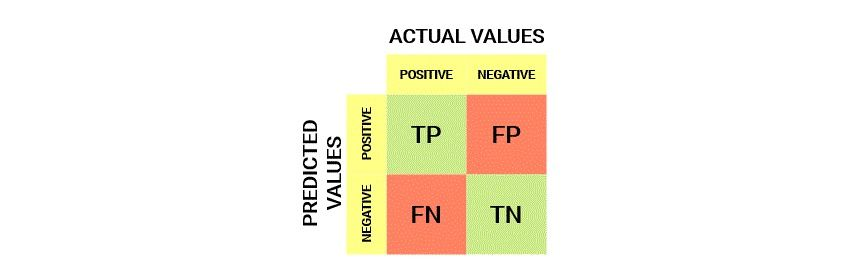  
[source](https://www.turing.com/kb/how-to-plot-confusion-matrix)

Let's now see some metrics for classification problems: 
* Accuracy: _how many observation were correctly predicted?_  
 is the number of correct predictions on the total test observations  
 (TP+TN)/(TP+FP+FN+TN)
- Precision: how many of the positive predicted observations are correct?  
 is the number of correct positive predictions on the total  number of positives predictions  
 TP/(TP+FP)  
 important for reducing false positives
- Sensitivity (Recall): How many of the actual positive observations are well classified?
 is the number of correct positive predictions on the total number of real actual positives
 TP/(TP+FN)  
 important for reducing false negatives
- F1 Score  
 " is the harmonic mean of precision and recall is the F1 score. It is used as an overall indicator that incorporates both precision and recall. This harmonic mean analyzes both false positives and false negatives and performs well on an imbalanced dataset."
 "2(p*r)/(p+r), where r is the recall and p is precision."
- Kappa: is the the prediction made better than a random prediction?  
 it compares the observed accuracy to an expected accuracy or the accuracy expected from random chance based on the number of instances in each class.  
 (Observed Accuracy - Expected Accuracy) / (1- Expected Accuracy)  
 It is useful especially with unbalanced classes in which randomly predicting  basing on class frequency could give discrete results.
- MCC (Matthews Correlation Coefficient)  
 it takes all possible prediction outcomes into account. is essentially a correlation coefficient between the observed and predicted classifications.  
 (TP x TN) - (FP x FN) / sqrt( (TP+FP)x(TP+FN)x(TN+FP)x(TN+FN) )  
 As with any correlation coefficient, its value will lie between -1.0 and +1.0. A value of +1 would indicate a perfect model.  
  
  
  [source1](https://www.turing.com/kb/how-to-plot-confusion-matrix), [source2](https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa)

In [294]:
from sklearn.metrics import accuracy_score

---

## Algorithms

As asked I'll model a Logistic Regression classifier, a RandomForest Classifier and a K-nearest neighbors classifier.  
We'll apply those methods to the entire dataframe and also to a subset consisting in the variables Solids, Organic_carbon and  Turbidity (Those are the more significative variables in explaining the differences between classes according to z-tests previously runned).  
  


The structure of the next section is:
* Entire dataset:
 - spot check
  - parameter optimisation
  - prediction
* Subset with 3 variables:
 - spot check
  - parameter optimisation
  - prediction
* Entire dataset balanced:
 - spot check
  - parameter optimisation
  - prediction
* Subset with 3 variables balanced:
 - spot check
  - parameter optimisation
  - prediction

In [295]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#creating sub-dataset containing only most significant variables
X_train_sub1=X_train[["Solids","Organic_carbon","Turbidity"]]
X_test_sub1=X_test[["Solids","Organic_carbon","Turbidity"]]

X_train_sub1_balanced=X_train_balanced[["Solids","Organic_carbon","Turbidity"]]
X_test_sub1_balanced=X_test_balanced[["Solids","Organic_carbon","Turbidity"]]


First we'll do a spot check to find out on which algorithms to focus into.

#### Entire dataset

In [55]:
##spot check

# Logistic Regression Classification
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelLR = LogisticRegression()
resultsLR1 = model_selection.cross_val_score(modelLR, X_train, y_train,scoring="accuracy" ,cv=kfold)
print("Logistic Regression Classification: ", resultsLR1.mean())

# KNN Classification
#from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
random_state = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelKNN = KNeighborsClassifier()
resultsKNN = model_selection.cross_val_score(modelKNN, X_train, y_train,scoring="accuracy" , cv=kfold)
print("KNN Classification: ",resultsKNN.mean())

# Random Forest Classifier
#from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelRF = RandomForestClassifier()
resultsRF = model_selection.cross_val_score(modelRF, X_train, y_train,scoring="accuracy" , cv=kfold)
print("Random Forest Classifier: ",resultsRF.mean())

Logistic Regression Classification:  0.6104007936507937
KNN Classification:  0.6295674603174604
Random Forest Classifier:  0.6696448412698411


I discard the Logistic Regression and optimize the other 2 algorithms

In [56]:
from sklearn.model_selection import GridSearchCV

In [65]:
#parameters optimisation

#prams to validate KNN
parameters_KNN = {
    'n_neighbors': np.arange(1,20, 1),#Number of neighbors to use
    'p': (1,2), #manhattan_distance (1) and euclidean_distance (2)
    'weights': ('uniform', 'distance'),#type of weights given to neighbors
    'algorithm':["auto"]}
                   
# with GridSearch
KNN = GridSearchCV(
    modelKNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)
# train on all combinations of params passed to Grid Search
KNN.fit(X_train, y_train)

# ignoring warnings because: "UserWarning: One or more of the test scores are non-finite"
import warnings
warnings.filterwarnings('ignore') 

#prams to validate Random Forest
rf_params = [{"max_features": [1,3,6, len(X_train.columns)], #max number of features considered for splitting a node
              "min_samples_split": [1, 10, 30, 50 ],# min number of data points placed in a node before the node is split
              "n_estimators":[3,10,50], # number of trees in the foreset
              "max_depth": [5,10,30]# max number of levels in each decision tree
            }]              
# Grid Search
rf = GridSearchCV(modelRF, rf_params, 
                        scoring="accuracy", # scoring metric to present
                        cv=5, # cross validation folders (4 training 1 validation)
                        n_jobs=-1, # parallel running jobs (-1 mean all toghether/the maximum)
                        verbose=1)

# train on all combinations of params passed to Grid Search
rf.fit(X_train, y_train)

print("KNN",f"accuracy score: {KNN.best_score_}, hyperparameters: {KNN.best_params_}")
print("Random Forest",f"accuracy score: {rf.best_score_}, hyperparameters: {rf.best_params_}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
KNN accuracy score: 0.6415778272704775, hyperparameters: {'algorithm': 'auto', 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}
Random Forest accuracy score: 0.6687305122494431, hyperparameters: {'max_depth': 10, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 50}


KNN  0.6358087487283826
Random Forest  0.6500508646998983


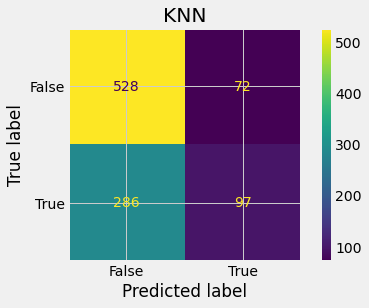

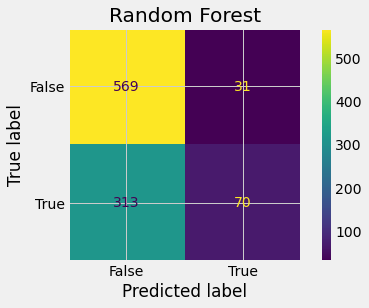

In [83]:
#predictions

#applying algorithms with optimal parameters to the test and printing the accuracies
print("KNN ",accuracy_score(KNN.predict(X_test),y_test)) #"predict" Call predict on the estimator with the best found parameters
print("Random Forest ",accuracy_score(rf.predict(X_test),y_test))

ConfusionMatrixDisplay(confusion_matrix(y_test, KNN.predict(X_test)),display_labels = [False, True]).plot()
plt.title("KNN")
ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(X_test)),display_labels = [False, True]).plot()
plt.title("Random Forest")
plt.show()

#### Best 3 variables

Now apply the same exact code to the subdataset of Solids and Organic carbon and Turbidity

In [85]:
## spot check

# Logistic Regression Classification
#from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression

seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelLR = LogisticRegression()
resultsLR1 = model_selection.cross_val_score(modelLR, X_train_sub1, y_train,scoring="accuracy" ,cv=kfold)
print("Logistic Regression Classification: ", resultsLR1.mean())

# KNN Classification
#from sklearn import model_selection
#from sklearn.neighbors import KNeighborsClassifier
random_state = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelKNN = KNeighborsClassifier()
resultsKNN = model_selection.cross_val_score(modelKNN, X_train_sub1, y_train,scoring="accuracy" , cv=kfold)
print("KNN Classification: ",resultsKNN.mean())

# Random Forest Classifier
#from sklearn import model_selection
#from sklearn.ensemble import RandomForestClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelRF = RandomForestClassifier()
resultsRF = model_selection.cross_val_score(modelRF, X_train_sub1, y_train,scoring="accuracy" , cv=kfold)
print("Random Forest Classifier: ",resultsRF.mean())

Logistic Regression Classification:  0.6108452380952382
KNN Classification:  0.5547341269841269
Random Forest Classifier:  0.5618452380952381


I discard KNN

In [86]:
#parameters optimisation

#prams to validate Random Forest
rf_params = [{"max_features": [1,3,6, len(X_train_sub2.columns)], #max number of features considered for splitting a node
              "min_samples_split": [1, 10, 30, 50 ],# min number of data points placed in a node before the node is split
              "n_estimators":[3,10,50], # number of trees in the foreset
              "max_depth": [5,10,30]# max number of levels in each decision tree
            }]              
#Grid search
rf = GridSearchCV(modelRF, rf_params, 
                        scoring="accuracy", # scoring metric to present
                        cv=5, # cross validation folders (4 training 1 validation)
                        n_jobs=-1, # parallel running jobs (-1 mean all toghether/the maximum)
                        verbose=1)

# train on all combinations of params passed to Grid Search
rf.fit(X_train_sub1, y_train)

#import warnings
#warnings.filterwarnings('ignore') #because "warnings.filterwarnings('ignore')"

#prams to validate Logistic regression
param_grid = [
    {'C' : np.logspace(-4, 4, 20),
     'penalty':['l1', 'l2']}]

#grid search
LR = GridSearchCV(modelLR, param_grid, 
                        
                        cv=5, # cross validation folders (4 training 1 validation)
                        n_jobs=-1, # parallel running jobs (-1 mean all toghether/the maximum)
                        verbose=1)

# train on all combinations of params passed to Grid Search
LR.fit(X_train_sub1, y_train)

print("Random Forest",f"accuracy score: {rf.best_score_}, hyperparameters: {rf.best_params_}")
print("Logistic Regression",f"accuracy score: {LR.best_score_}, hyperparameters: {LR.best_params_}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Random Forest accuracy score: 0.6126404355357584, hyperparameters: {'max_depth': 5, 'max_features': 1, 'min_samples_split': 30, 'n_estimators': 10}
Logistic Regression accuracy score: 0.6113090819104181, hyperparameters: {'C': 0.0001, 'penalty': 'l2'}


Random Forest  0.602238046795524
Logistic Regression  0.6103763987792472


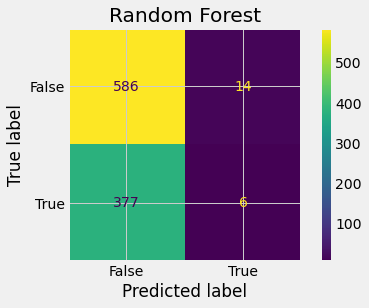

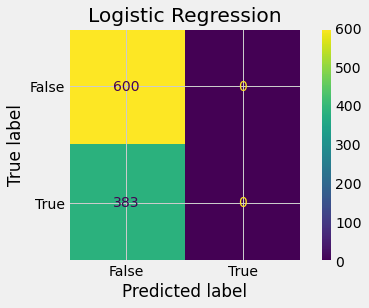

In [88]:
# predictions

#applying algorithms with optimal parameters
print("Random Forest ",accuracy_score(rf.predict(X_test_sub1),y_test)) #predict Call predict on the estimator with the best found parameters
print("Logistic Regression ", accuracy_score(LR.predict(X_test_sub1),y_test))

ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(X_test_sub1)),display_labels = [False, True]).plot()
plt.title("Random Forest")
ConfusionMatrixDisplay(confusion_matrix(y_test, LR.predict(X_test_sub1)),display_labels = [False, True]).plot()
plt.title("Logistic Regression")
plt.show()

###### Repeating all the algorithm section with the balanced dataset

In [244]:
## spot check

# Logistic Regression Classification
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelLR = LogisticRegression()
resultsLR1 = model_selection.cross_val_score(modelLR, X_train_balanced, y_train_balanced,scoring="accuracy" ,cv=kfold)
print("Logistic Regression Classification: ", resultsLR1.mean())

# KNN Classification
#from sklearn import model_selection
#from sklearn.neighbors import KNeighborsClassifier
random_state = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelKNN = KNeighborsClassifier()
resultsKNN = model_selection.cross_val_score(modelKNN, X_train_balanced, y_train_balanced,scoring="accuracy" , cv=kfold)
print("KNN Classification: ",resultsKNN.mean())

# Random Forest Classifier
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelRF = RandomForestClassifier()
resultsRF = model_selection.cross_val_score(modelRF, X_train_balanced, y_train_balanced,scoring="accuracy" , cv=kfold)
print("Random Forest Classifier: ",resultsRF.mean())

Logistic Regression Classification:  0.49478160919540226
KNN Classification:  0.5830410509031199
Random Forest Classifier:  0.6008275862068967


In [245]:
#parameters optimisation

#prams to validate KNN
parameters_KNN = {
    'n_neighbors': np.arange(1,20, 1),#Number of neighbors to use
    'p': (1,2), #manhattan_distance (1) and euclidean_distance (2)
    'weights': ('uniform', 'distance'),#type of weights given to neighbors
    'algorithm':["auto"]}
                   
# with GridSearch
KNN = GridSearchCV(
    modelKNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)
# train on all combinations of params passed to Grid Search
KNN.fit(X_train_balanced, y_train_balanced)


#prams to validate Random Forest
rf_params = [{"max_features": [1,3,6, len(X_train.columns)], #max number of features considered for splitting a node
              "min_samples_split": [1., 10, 30, 50 ],# min number of data points placed in a node before the node is split
              "n_estimators":[3,10,50], # number of trees in the foreset
              "max_depth": [5,10,30]# max number of levels in each decision tree
            }]              
# Grid Search
rf = GridSearchCV(modelRF, rf_params, 
                        scoring="accuracy", # scoring metric to present
                        cv=5, # cross validation folders (4 training 1 validation)
                        n_jobs=-1, # parallel running jobs (-1 mean all toghether/the maximum)
                        verbose=1)

# train on all combinations of params passed to Grid Search
rf.fit(X_train_balanced, y_train_balanced)

print("KNN",f"accuracy score: {KNN.best_score_}, hyperparameters: {KNN.best_params_}")
print("Random Forest",f"accuracy score: {rf.best_score_}, hyperparameters: {rf.best_params_}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
KNN accuracy score: 0.5950519852640197, hyperparameters: {'algorithm': 'auto', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
Random Forest accuracy score: nan, hyperparameters: {'max_depth': 5, 'max_features': 1, 'min_samples_split': 1.0, 'n_estimators': 3}


KNN  0.566579634464752
Random Forest  0.5


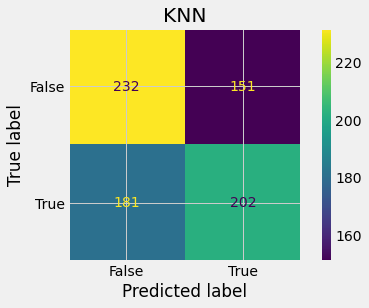

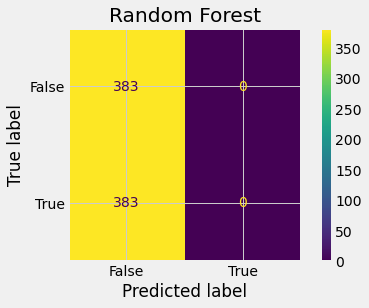

In [246]:
#predictions

#applying algorithms with optimal parameters to the test and printing the accuracies
print("KNN ",accuracy_score(KNN.predict(X_test_balanced),y_test_balanced)) #"predict" Call predict on the estimator with the best found parameters
print("Random Forest ",accuracy_score(rf.predict(X_test_balanced),y_test_balanced))

ConfusionMatrixDisplay(confusion_matrix(y_test_balanced, KNN.predict(X_test_balanced)),display_labels = [False, True]).plot()
plt.title("KNN")
ConfusionMatrixDisplay(confusion_matrix(y_test_balanced, rf.predict(X_test_balanced)),display_labels = [False, True]).plot()
plt.title("Random Forest")
plt.show()

#### best 3 variables on balanced data

In [251]:
## spot check

# Logistic Regression Classification

#from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression

seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelLR = LogisticRegression()
resultsLR1 = model_selection.cross_val_score(modelLR, X_train_sub1_balanced, y_train_balanced,scoring="accuracy" ,cv=kfold)
print("Logistic Regression Classification: ", resultsLR1.mean())

# KNN Classification
#from sklearn import model_selection
#from sklearn.neighbors import KNeighborsClassifier
random_state = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelKNN = KNeighborsClassifier()
resultsKNN = model_selection.cross_val_score(modelKNN, X_train_sub1_balanced, y_train_balanced,scoring="accuracy" , cv=kfold)
print("KNN Classification: ",resultsKNN.mean())

# Random Forest Classifier
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
modelRF = RandomForestClassifier()
resultsRF = model_selection.cross_val_score(modelRF, X_train_sub1_balanced, y_train_balanced,scoring="accuracy" , cv=kfold)
print("Random Forest Classifier: ",resultsRF.mean())

Logistic Regression Classification:  0.5091100164203612
KNN Classification:  0.5275172413793104
Random Forest Classifier:  0.5074745484400657


In [258]:
#parameters optimisation

#prams to validate KNN
parameters_KNN = {
    'n_neighbors': np.arange(1,20, 1),#Number of neighbors to use
    'p': (1,2), #manhattan_distance (1) and euclidean_distance (2)
    'weights': ('uniform', 'distance'),#type of weights given to neighbors
    'algorithm':["auto"]}
                   
# with GridSearch
KNN = GridSearchCV(
    modelKNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)
# train on all combinations of params passed to Grid Search
KNN.fit(X_train_sub1_balanced, y_train_balanced)



#prams to validate Logistic regression
param_grid = [
    {'C' : np.logspace(-4, 4, 20),
     'penalty':['l1', 'l2']}]

#grid search
LR = GridSearchCV(modelLR, param_grid, 
                        
                        cv=5, # cross validation folders (4 training 1 validation)
                        n_jobs=-1, # parallel running jobs (-1 mean all toghether/the maximum)
                        verbose=1)

# train on all combinations of params passed to Grid Search
LR.fit(X_train_sub1_balanced, y_train_balanced)

print("KNN",f"accuracy score: {KNN.best_score_}, hyperparameters: {KNN.best_params_}")
print("Logistic Regression",f"accuracy score: {LR.best_score_}, hyperparameters: {LR.best_params_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
KNN accuracy score: 0.5223069995906673, hyperparameters: {'algorithm': 'auto', 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
Logistic Regression accuracy score: 0.5240573065902578, hyperparameters: {'C': 0.00026366508987303583, 'penalty': 'l2'}


KNN  0.5052219321148825
Logistic Regression  0.4804177545691906


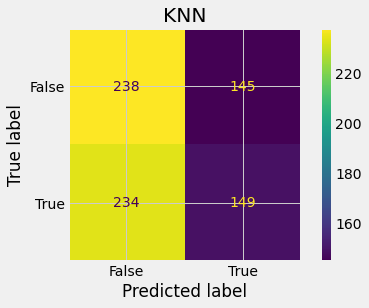

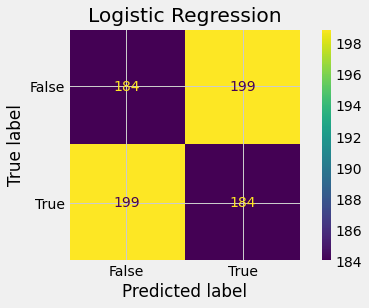

In [259]:
# predictions

#applying algorithms with optimal parameters
print("KNN ",accuracy_score(KNN.predict(X_test_sub1_balanced),y_test_balanced)) #"predict" Call predict on the estimator with the best found parameters
print("Logistic Regression ", accuracy_score(LR.predict(X_test_sub1_balanced),y_test_balanced))

ConfusionMatrixDisplay(confusion_matrix(y_test_balanced, KNN.predict(X_test_sub1_balanced)),display_labels = [False, True]).plot()
plt.title("KNN")
ConfusionMatrixDisplay(confusion_matrix(y_test_balanced, LR.predict(X_test_sub1_balanced)),display_labels = [False, True]).plot()
plt.title("Logistic Regression")
plt.show()

---

# Final evaluation

The best algorithm to predict the potability of the water samples, **evaluating with accuracy**, is a **Random Forest Classifier** (with the maximum number of levels in each decision tree equal to 10, 'max_features': 6, the minimum number of data points placed in a node before the node is split equal to 10 and 50 trees in the foreset) trained on the **entire dataset**.  


One thing to notice is that by reducing the number of variables the algorithm that performed the best was the one that did the worse on the full dataset.

The maximum accuracy that we obtain is 65% which is really close to the classes distribution (61-39).  
Bacause of that I repeated all the trainings and optimisations on a balanced dataset (by undersampling the original one), but results didn't change.  
We can see that sometimes the best thing the algorithm achive to do is to classify all as the same class.
I was expecting this result because of:
* The results of z tests on groups means
- how are variables distributed 
- they are completely uncorrelated.

I think the dataset may have been created with software and is not real data from water samples. Probably variables have been created from indipendet normal distributions.  
My prediction is that no matter wchich algorith we choose, the performance would never increase significantly.